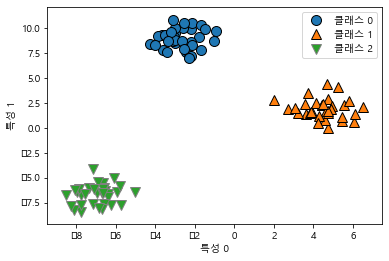

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)


from sklearn.datasets import make_blobs

X,y = make_blobs(random_state =42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

In [3]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(X,y)#multinomial = auto
print("계수 배열의 크기 : ", logr.coef_.shape)
print("절편 배열의 크기 : ", logr.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


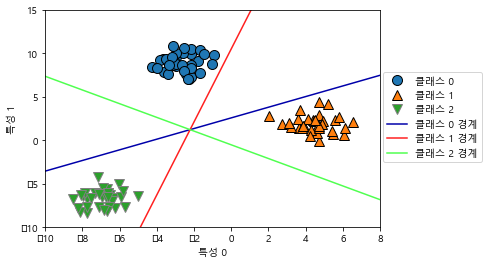

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line =np.linspace(-15,15) 
for coef, intercept, color in zip(logr.coef_,logr.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],
           loc=(1.01,0.3))

In [5]:
#multinomiaㅣ로 실행 했을 때는 3개의 클래스를 결정경계가 정확하게 나누어 진다.

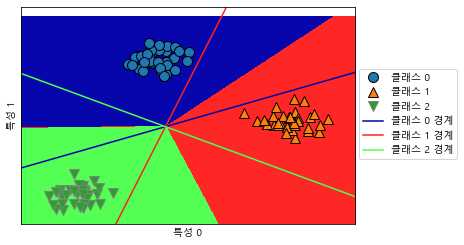

In [6]:
mglearn.plots.plot_2d_classification(logr,X,fill=True,alpha=7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line =np.linspace(-15,15) 
for coef, intercept, color in zip(logr.coef_,logr.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],
           loc=(1.01,0.3))

In [7]:
#삼각형내의 점들은 가장 가까운 직선의 클래스

In [8]:
print("계수 배열 :\n",logr.coef_)

계수 배열 :
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


In [ ]:
#이번에 Multionmal가 아닌 OVR로 세개의 클래스를 나누어 보겠습니다.

In [11]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)#ovr
print("계수 배열의 크기 : ", linear_svm.coef_.shape)
print("절편 배열의 크기 : ", linear_svm.intercept_.shape )

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


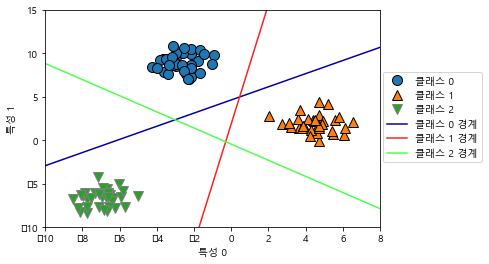

In [12]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line =np.linspace(-15,15) 
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],
           loc=(1.01,0.3))

In [ ]:
#그림의 중앙의 삼각형 영역은 세 분류기가 모두 나머지로 분류를 한 것으로 나타냅니다
#분류 공식의 결과가 가장 높은 클래스가 이 곳의 데이터 포인트의 클래스 입니다
#즉 가장 가까운 직선의 클래스가 되는 것입니다.

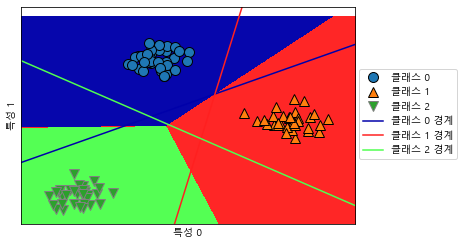

In [13]:
mglearn.plots.plot_2d_classification(logr,X,fill=True,alpha=7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line =np.linspace(-15,15) 
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],
           loc=(1.01,0.3))

In [ ]:
#선형 모델의 장점인 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는 비교적 쉽게 
#이해 할수 있다는 것이 보이지만
#계수의  값들이 왜 그런지는 명확하지 않을 수 있다는 것을 알 수 있다.

In [16]:
#아이리스 로지스틱 회귀 테스트
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.40)
logr = LogisticRegression().fit(X,y)
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}",format(logr.score(X_test,y_test)))
print("Number of mislabled points out of a total %d points : %d",(X_test.shape[0]
                                                                 ,(y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: {:.2f} 0.9166666666666666
Number of mislabled points out of a total %d points : %d (60, 5)


In [ ]:
#첫 번째 줄은 같지만 두 번째 부터 다르다는 것을 알 수 있다.

In [17]:
print("predict:\n",logr.predict(X_test[:30]))
print("probability:\n",logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[3.31268622e-04 1.22812782e-01 8.76855949e-01]
 [1.49073655e-02 9.68438212e-01 1.66544225e-02]
 [9.87117165e-01 1.28825421e-02 2.92956826e-07]
 [3.90825442e-06 4.07650401e-02 9.59231052e-01]
 [9.70874163e-01 2.91252303e-02 6.06746465e-07]
 [6.11405883e-06 1.15477255e-02 9.88446160e-01]
 [9.82263653e-01 1.77360426e-02 3.04444891e-07]
 [4.18438946e-03 7.27172728e-01 2.68642882e-01]
 [2.31528229e-03 7.61349534e-01 2.36335183e-01]
 [2.61148377e-02 9.31808632e-01 4.20765305e-02]
 [2.53911902e-04 3.18879994e-01 6.80866094e-01]
 [9.79354747e-03 7.84459210e-01 2.05747243e-01]
 [5.77051317e-03 8.37816949e-01 1.56412538e-01]
 [4.45378311e-03 7.90211050e-01 2.05335167e-01]
 [5.61604135e-03 7.61348215e-01 2.33035744e-01]
 [9.83304175e-01 1.66955727e-02 2.52473549e-07]
 [9.29207750e-03 7.96124175e-01 1.94583747e-01]
 [1.42542642e-02 8.99854691e-01 8.58910449e-02]
 [9.65387482e-01 3.46119197e-02 5.97992995e-07]
 [